In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_iris = pd.read_csv("iris.csv")
display(df_iris.head())

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
datadict = pd.DataFrame(df_iris.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = df_iris.isnull().sum()
datadict['%_Valores_Nulos'] = (df_iris.isnull().sum() / df_iris.shape[0]) * 100
datadict['NUnique']=df_iris.nunique()

In [ ]:
datadict

,Dtype,Valores_Nulos,%_Valores_Nulos,NUnique
Sepal_Length,float64,0,0.0,35
Sepal_Width,float64,0,0.0,23
Petal_Length,float64,0,0.0,43
Petal_Width,float64,0,0.0,22
Species,object,0,0.0,3


#**Questão 1**

In [ ]:
#Informações DataFrame

total_linhas = df_iris.shape[0]

total_colunas = df_iris.shape[1]

tipos_de_variaveis = df_iris.dtypes

estat_descrit = df_iris.describe()


print(f"Total de linhas do DataFrame:{total_linhas} \n")

print(f"Total de Colunas do DataFrame:{total_colunas} \n")

print(f"Tipos das variáveis do DataFrame:\n{tipos_de_variaveis} \n")

print(f"Estatística Descritiva do DataFrame: \n{estat_descrit}")

Total de linhas do DataFrame:150 

Total de Colunas do DataFrame:5 

Tipos das variáveis do DataFrame:
Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object 

Estatística Descritiva do DataFrame: 
       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


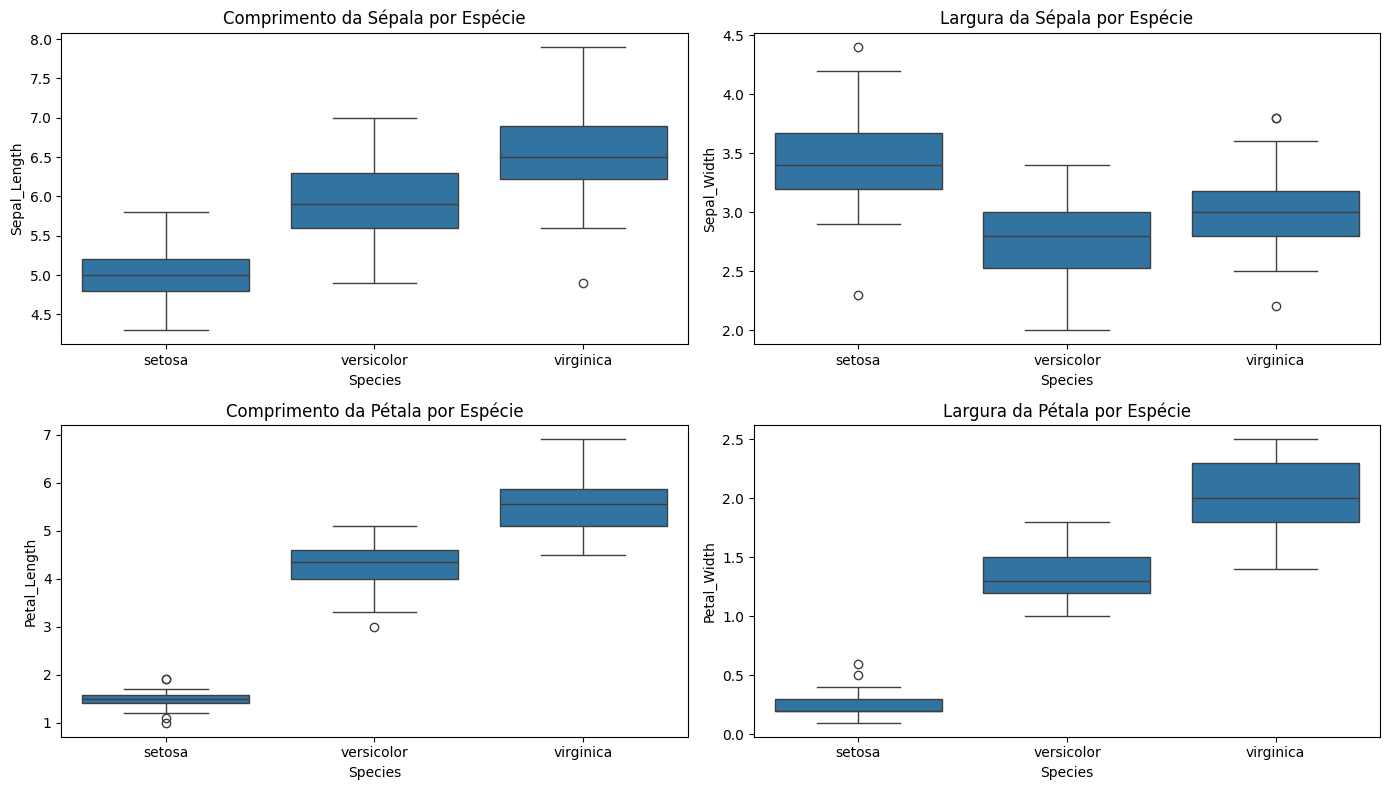

In [ ]:
# Boxplots para cada propriedade por espécie
plt.figure(figsize=(14, 8))


plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='Sepal_Length', data=df_iris)
plt.title('Comprimento da Sépala por Espécie')

plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='Sepal_Width', data=df_iris)
plt.title('Largura da Sépala por Espécie')

plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='Petal_Length', data=df_iris)
plt.title('Comprimento da Pétala por Espécie')

plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='Petal_Width', data=df_iris)
plt.title('Largura da Pétala por Espécie')

plt.tight_layout()
plt.show()


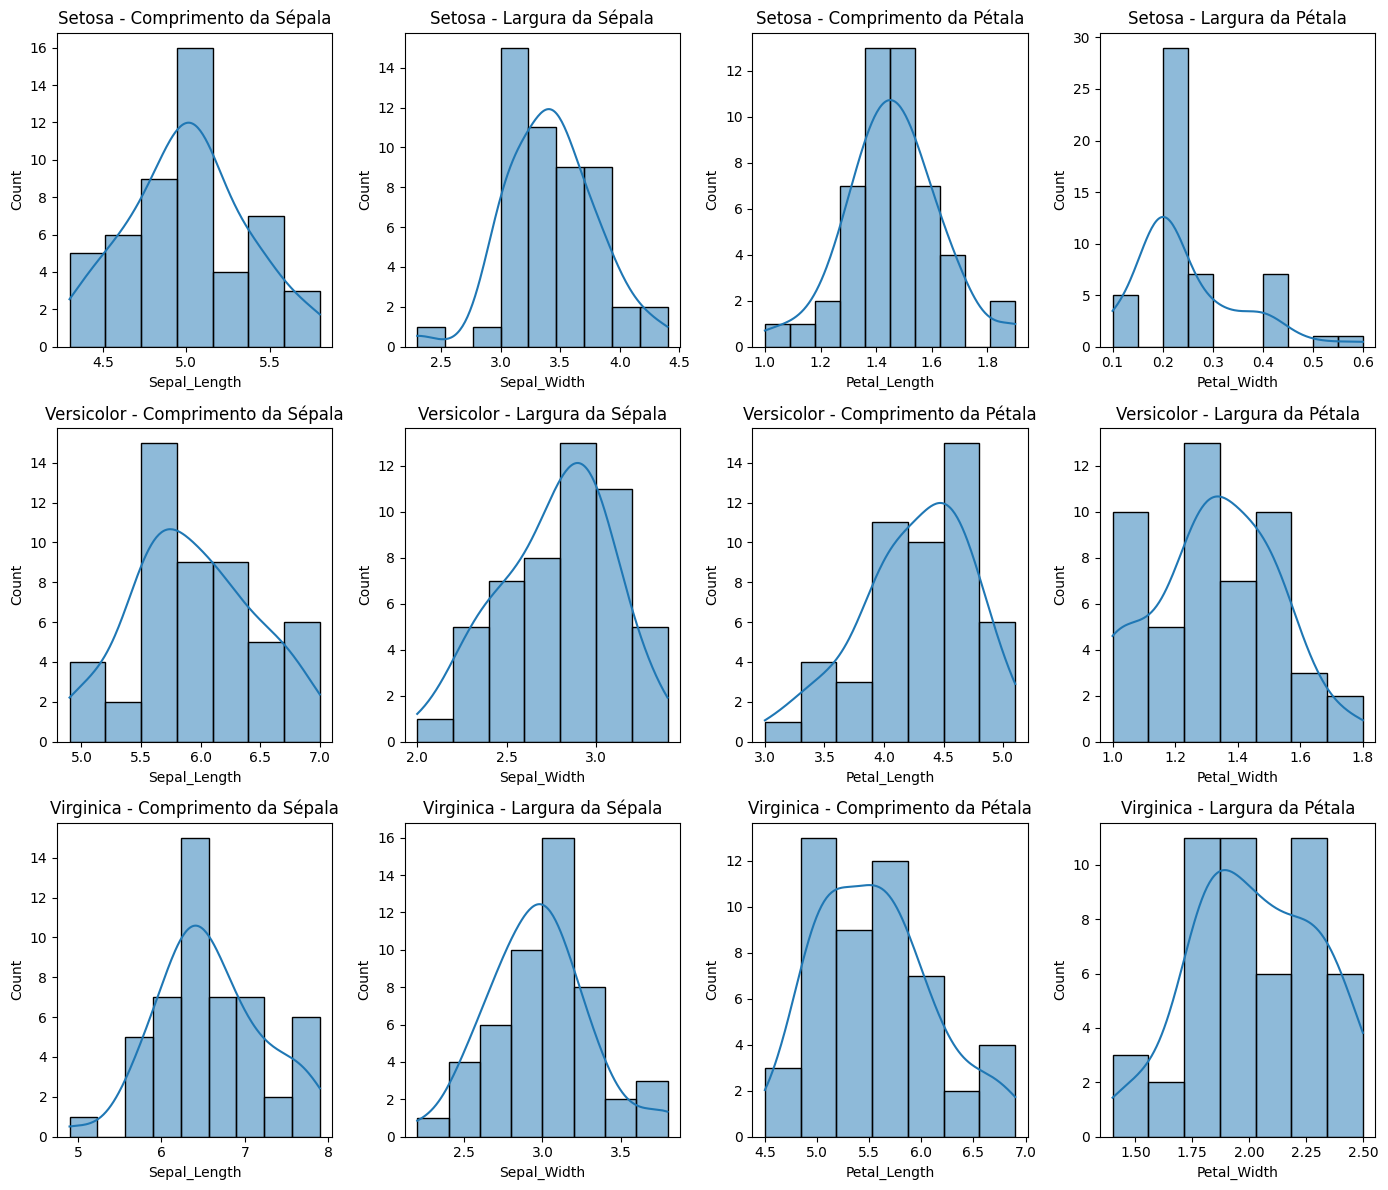

In [ ]:
species_list = df_iris['Species'].unique()

plt.figure(figsize=(14, 12))

# Iterar sobre cada espécie e propriedade para criar histogramas separados
for idx, species in enumerate(species_list):
    species_data = df_iris[df_iris['Species'] == species]

    plt.subplot(3, 4, idx * 4 + 1)
    sns.histplot(data=species_data, x='Sepal_Length', kde=True)
    plt.title(f'{species.capitalize()} - Comprimento da Sépala')

    plt.subplot(3, 4, idx * 4 + 2)
    sns.histplot(data=species_data, x='Sepal_Width', kde=True)
    plt.title(f'{species.capitalize()} - Largura da Sépala')

    plt.subplot(3, 4, idx * 4 + 3)
    sns.histplot(data=species_data, x='Petal_Length', kde=True)
    plt.title(f'{species.capitalize()} - Comprimento da Pétala')

    plt.subplot(3, 4, idx * 4 + 4)
    sns.histplot(data=species_data, x='Petal_Width', kde=True)
    plt.title(f'{species.capitalize()} - Largura da Pétala')

plt.tight_layout()
plt.show()

Analisando os boxplots e histogramas das propriedades do conjunto de dados Iris, podemos observar que, sim, é possível diferenciar entre as diferentes espécies utilizando apenas uma ou mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width). O Sepal Length é a propriedade que apresenta a maior diferença entre as espécies. O Sepal Length da Setosa é claramente menor que o das outras duas espécies, o que a torna facilmente distinguível. As outras duas espécies (Versicolor e Virginica) apresentam Sepal Lengths mais próximos, mas ainda com alguma sobreposição.

In [ ]:
logreg = LogisticRegression()

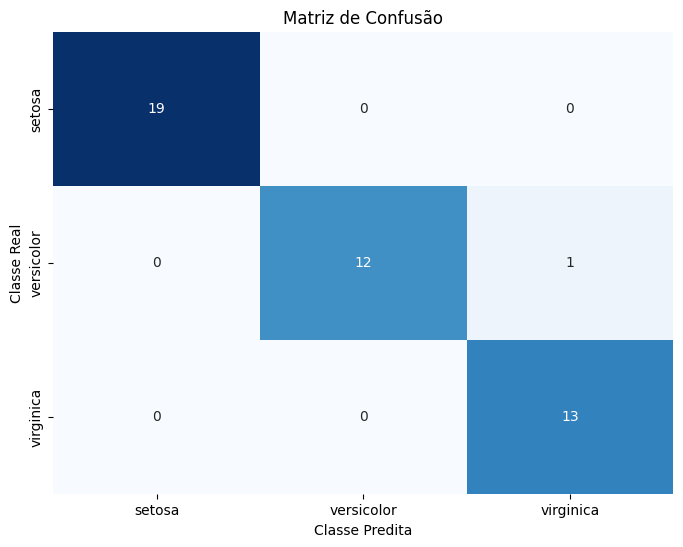

Acurácia: 0.9777777777777777
Precisão para a classe setosa: 1.0
Recall para a classe setosa: 1.0
Precisão para a classe versicolor: 1.0
Recall para a classe versicolor: 0.9230769230769231
Precisão para a classe virginica: 0.9285714285714286
Recall para a classe virginica: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

## Divisão do dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Treino do modelo
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

## Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)  # average=None para obter precisão para cada classe
recall = recall_score(y_test, y_pred, average=None)        # average=None para obter recall para cada classe

## Matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

print("Acurácia:", accuracy)
for idx, class_name in enumerate(iris.target_names):
    print(f"Precisão para a classe {class_name}: {precision[idx]}")
    print(f"Recall para a classe {class_name}: {recall[idx]}")

## Relatório de classificação
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


#**Questão 2**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()


In [ ]:
df_digits = pd.DataFrame(data=X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
df_digits['target'] = y

print(df_digits.head())

print(f"\nQuantidade de linhas (amostras): {df_digits.shape[0]}")
print(f"Quantidade de colunas (features): {df_digits.shape[1]}")

   pixel_0  pixel_1  pixel_2  pixel_3  target
0      5.1      3.5      1.4      0.2       0
1      4.9      3.0      1.4      0.2       0
2      4.7      3.2      1.3      0.2       0
3      4.6      3.1      1.5      0.2       0
4      5.0      3.6      1.4      0.2       0

Quantidade de linhas (amostras): 150
Quantidade de colunas (features): 5


In [ ]:
tipos_de_variaveis = df_digits.dtypes

estat_descrit = df_digits.describe()


print(f"Tipos das variáveis do DataFrame:\n{tipos_de_variaveis} \n")

print(f"Estatística Descritiva do DataFrame: \n{estat_descrit}")

Tipos das variáveis do DataFrame:
pixel_0    float64
pixel_1    float64
pixel_2    float64
pixel_3    float64
target       int64
dtype: object 

Estatística Descritiva do DataFrame: 
          pixel_0     pixel_1     pixel_2     pixel_3      target
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333    1.000000
std      0.828066    0.435866    1.765298    0.762238    0.819232
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.350000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.000000


Todos são dados numéricos

In [ ]:
datadict = pd.DataFrame(df_digits.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = df_digits.isnull().sum()
datadict['%_Valores_Nulos'] = (df_digits.isnull().sum() / df_digits.shape[0]) * 100
datadict['NUnique']=df_digits.nunique()

In [ ]:
datadict

,Dtype,Valores_Nulos,%_Valores_Nulos,NUnique
pixel_0,float64,0,0.0,35
pixel_1,float64,0,0.0,23
pixel_2,float64,0,0.0,43
pixel_3,float64,0,0.0,22
target,int64,0,0.0,3


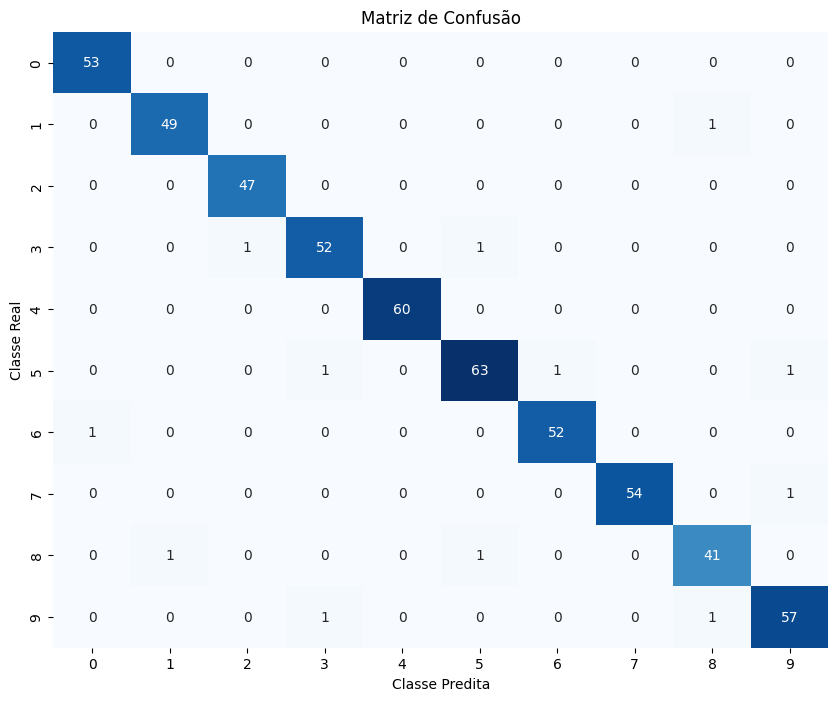

Acurácia: 0.9777777777777777
Precisão para a classe 0: 0.9814814814814815
Recall para a classe 0: 1.0
Precisão para a classe 1: 0.98
Recall para a classe 1: 0.98
Precisão para a classe 2: 0.9791666666666666
Recall para a classe 2: 1.0
Precisão para a classe 3: 0.9629629629629629
Recall para a classe 3: 0.9629629629629629
Precisão para a classe 4: 1.0
Recall para a classe 4: 1.0
Precisão para a classe 5: 0.9692307692307692
Recall para a classe 5: 0.9545454545454546
Precisão para a classe 6: 0.9811320754716981
Recall para a classe 6: 0.9811320754716981
Precisão para a classe 7: 1.0
Recall para a classe 7: 0.9818181818181818
Precisão para a classe 8: 0.9534883720930233
Recall para a classe 8: 0.9534883720930233
Precisão para a classe 9: 0.9661016949152542
Recall para a classe 9: 0.9661016949152542

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      0.98      0.98        50
 

In [ ]:

X = digits.data
y = digits.target

## Divisão do dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Treino do modelo
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

## Previsões
y_pred = model.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)  # average=None para obter precisão para cada classe
recall = recall_score(y_test, y_pred, average=None)        # average=None para obter recall para cada classe


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

print("Acurácia:", accuracy)
for idx in range(len(precision)):
    print(f"Precisão para a classe {idx}: {precision[idx]}")
    print(f"Recall para a classe {idx}: {recall[idx]}")

## Relatório de classificação
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=[str(i) for i in np.arange(10)]))